<a href="https://colab.research.google.com/github/Ihsanalmasry/MachingLearning_Labs_IHSAN-ALMASRY/blob/main/MLF_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#####Exercise 1.1
n = 5

# Single loop for the entire pattern
for i in range(-n + 1, n):
    line = 'X ' * (n - abs(i))
    print(line.strip())

X
X X
X X X
X X X X
X X X X X
X X X X
X X X
X X
X


In [4]:
#####Exercise 1.2
input_str = "n45as29@#8ss6"

total = sum(int(char) for char in input_str if char.isdigit())
print(total)

34


In [5]:
#####Exercise 1.3
def int_to_binary(n):
    if n == 0:
        return "0"

    binary = []
    is_negative = False

    # Handling negative numbers
    if n < 0:
        is_negative = True
        n = -n

    # Converting to binary
    while n > 0:
        binary.append(str(n % 2))
        n = n // 2

    # Reversing to get correct order
    binary_str = ''.join(reversed(binary))

    # Adding negative sign if needed
    if is_negative:
        binary_str = "-" + binary_str

    return binary_str

# Test cases
print(int_to_binary(10))
print(int_to_binary(0))
print(int_to_binary(1))
print(int_to_binary(-5))
print(int_to_binary(255))

1010
0
1
-101
11111111


In [20]:
#####Exercise 1.4
#Iterative Approach
def fibonacci(upper_threshold: int) -> list:
    if upper_threshold <= 0:
        return [0]

    sequence = [0, 1]
    while True:
        next_num = sequence[-1] + sequence[-2]
        if next_num >= upper_threshold:
            break
        sequence.append(next_num)
    return sequence
#examples
print('Iterative Approach')
print(fibonacci(10))
print(fibonacci(1))
print(fibonacci(2))
print(fibonacci(0))


#Recursive Approach
def fibonacci(upper_threshold: int, a=0, b=1, sequence=None) -> list:
    if sequence is None:
        sequence = [0]
    if upper_threshold <= 1:
        return sequence

    if b < upper_threshold:
        sequence.append(b)
        return fibonacci(upper_threshold, b, a+b, sequence)
    return sequence
#examples
print('Recursive Approach')
print(fibonacci(100))
print(fibonacci(18))
print(fibonacci(20))
print(fibonacci(30))


#Memoization Approach
def fibonacci(upper_threshold: int, memo={0:0, 1:1}) -> list:
    def fib(n):
        if n not in memo:
            memo[n] = fib(n-1) + fib(n-2)
        return memo[n]

    if upper_threshold <= 0:
        return [0]

    result = []
    n = 0
    while True:
        current = fib(n)
        if current >= upper_threshold:
            break
        result.append(current)
        n += 1
    return result
#examples
print('Memoization Approach')
print(fibonacci(150))
print(fibonacci(8))
print(fibonacci(210))
print(fibonacci(35))


Iterative Approach
[0, 1, 1, 2, 3, 5, 8]
[0, 1]
[0, 1, 1]
[0]
Recursive Approach
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
[0, 1, 1, 2, 3, 5, 8, 13]
[0, 1, 1, 2, 3, 5, 8, 13]
[0, 1, 1, 2, 3, 5, 8, 13, 21]
Memoization Approach
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
[0, 1, 1, 2, 3, 5]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [27]:
#####Exercise 1.5
import random

def rock_paper_scissors() -> None:
    moves = ['rock', 'paper', 'scissors']
    win_conditions = {
        'rock': 'scissors',
        'paper': 'rock',
        'scissors': 'paper'
    }

    user_score = 0
    computer_score = 0
    rounds_played = 0

    while True:
        try:
            total_rounds = int(input("How many rounds would you like to play? "))
            if total_rounds > 0:
                break
            print("Please enter a positive number.")
        except ValueError:
            print("Please enter a valid number.")

    # Game loop
    while rounds_played < total_rounds:
        print(f"\nRound {rounds_played + 1} of {total_rounds}")

        user_move = input("Enter your move (rock, paper, scissors): ").lower()
        while user_move not in moves:
            print("Invalid move! Please try again.")
            user_move = input("Enter your move (rock, paper, scissors): ").lower()

        computer_move = random.choice(moves)
        print(f"Computer chose: {computer_move}")

        # Determining round winner
        if user_move == computer_move:
            print("It's a tie!")
        elif win_conditions[user_move] == computer_move:
            print("You win this round!")
            user_score += 1
        else:
            print("Computer wins this round!")
            computer_score += 1

        rounds_played += 1
        print(f"Score: You {user_score} - {computer_score} Computer\n")


    print("\nFinal Results:")
    print(f"Total Score: You {user_score} - {computer_score} Computer")
    if user_score > computer_score:
        print("You win the game!")
    elif computer_score > user_score:
        print("You lose the game!")
    else:
        print("The game is a tie!")


rock_paper_scissors()

How many rounds would you like to play? 2

Round 1 of 2
Enter your move (rock, paper, scissors): scissors
Computer chose: rock
Computer wins this round!
Score: You 0 - 1 Computer


Round 2 of 2
Enter your move (rock, paper, scissors): scissors
Computer chose: rock
Computer wins this round!
Score: You 0 - 2 Computer


Final Results:
Total Score: You 0 - 2 Computer
You lose the game!


In [33]:
####Exercise 2.1
import numpy as np
import time

def create_array_nxn(n: int) -> np.ndarray:
    if n <= 0:
        raise ValueError("n must be a positive integer")
    return np.arange(n**2 - 1, -1, -1).reshape(n, n)

def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    result = arr.copy()
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if result[i, j] < threshold:
                result[i, j] = 0
    return result

def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    result = arr.copy()
    result[result < threshold] = 0
    return result

def compare_performance(n: int, threshold: int) -> None:
    arr = create_array_nxn(n)

    # Measure loop-based approach
    start_time = time.time()
    _ = apply_threshold_loop(arr, threshold)
    loop_time = time.time() - start_time

    # Measure vectorized approach
    start_time = time.time()
    _ = apply_threshold_vectorized(arr, threshold)
    vec_time = time.time() - start_time

    print(f"Performance comparison for {n}x{n} array:")
    print(f"Loop-based approach: {loop_time:.6f} seconds")
    print(f"Vectorized approach: {vec_time:.6f} seconds")
    print(f"Vectorized is {loop_time/vec_time:.1f}x faster")


compare_performance(1000, 5000)

Performance comparison for 1000x1000 array:
Loop-based approach: 0.232347 seconds
Vectorized approach: 0.004861 seconds
Vectorized is 47.8x faster


Displays negative float


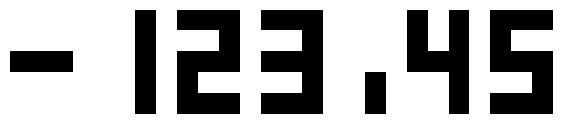

Displays decimal number


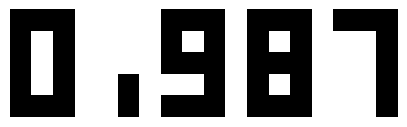

Displays negative decimal


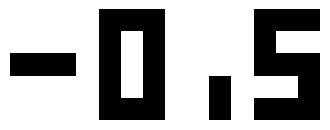

In [37]:
####Exercise 2.2
import numpy as np
import matplotlib.pyplot as plt

def show_in_digi(input_number: float) -> None:
    patterns = {
        "1": np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
        "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]),
        "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
        "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]),
        "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
        "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
        "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
        "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
        "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
        "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]),
        "-": np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1], [0, 0, 0], [0, 0, 0]]),
        ".": np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 1, 0], [0, 1, 0]])
    }

    # Convert number to string and process each character
    chars = list(str(input_number))
    display_segments = []

    for char in chars:
        if char in patterns:
            display_segments.append(patterns[char])
            # Add small space between characters except after decimal point
            if char != ".":
                display_segments.append(np.zeros((5, 1)))

    # Remove last space if present
    if display_segments and display_segments[-1].shape == (5, 1):
        display_segments = display_segments[:-1]

    # Combine all segments horizontally
    if display_segments:
        display = np.concatenate(display_segments, axis=1)
    else:
        display = np.zeros((5, 3))

    # Display the result
    plt.figure(figsize=(len(chars), 2))
    plt.imshow(display, cmap='binary', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()


print("Displays negative float")
show_in_digi(-123.45)
print("Displays decimal number")
show_in_digi(0.987)
print("Displays negative decimal")
show_in_digi(-0.5)